<h1>laptop price pridiction</h1>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<h4>Importing dataset</h4>


In [ ]:
df = pd.read_csv("/content/laptop_prices.csv")

In [ ]:
df.head() # check first 5 rows

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.tail() # check last 5 rows

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [ ]:
df.shape

(1275, 23)

In [ ]:
df.info() ## data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
df.describe() # data description

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
print(df.isnull().sum()) ## check null values

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [ ]:
df = df.dropna() ## drop null values if any

In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [ ]:
print(df['Company'].value_counts())

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


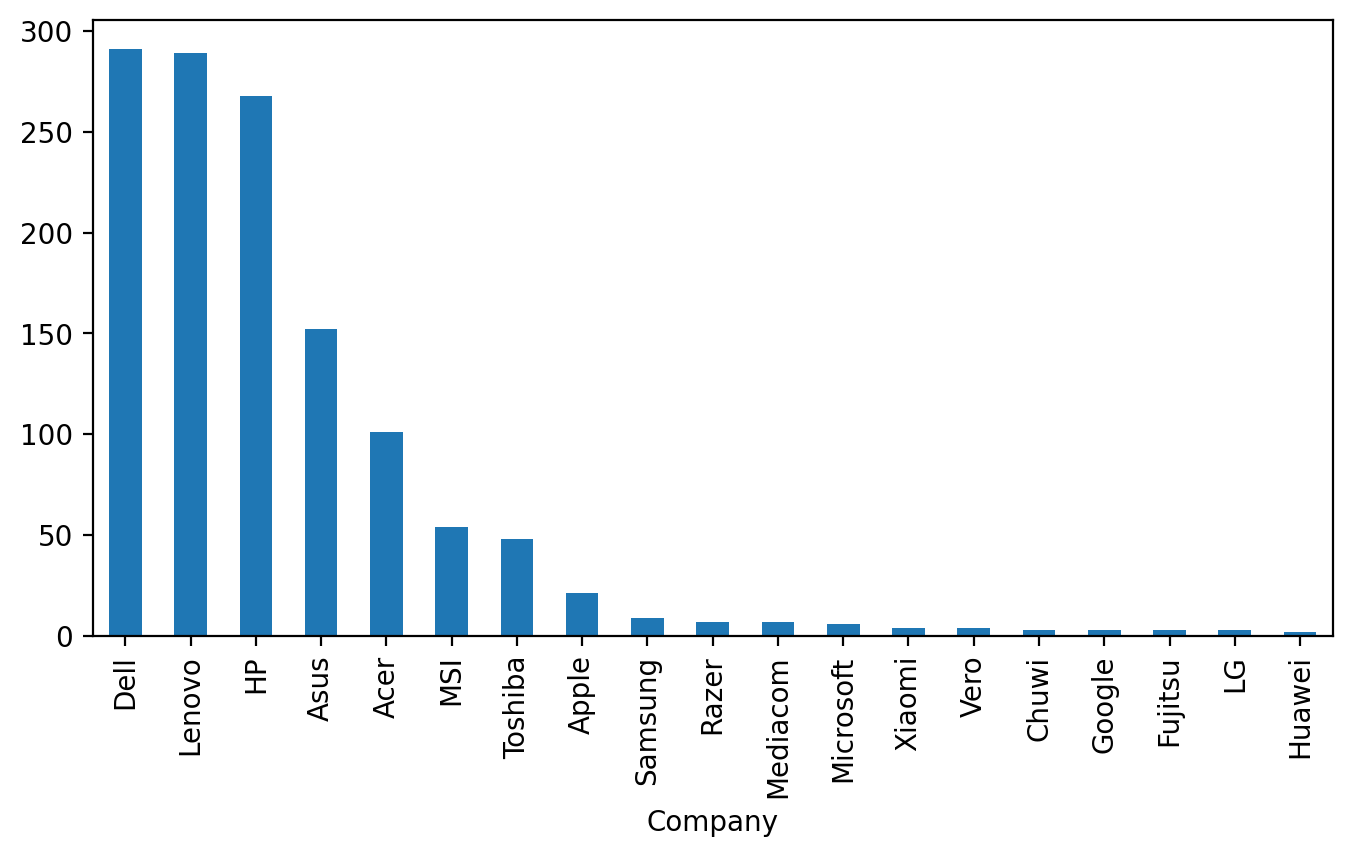

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot bar graph of company
df['Company'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
print(df['OS'].value_counts())

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


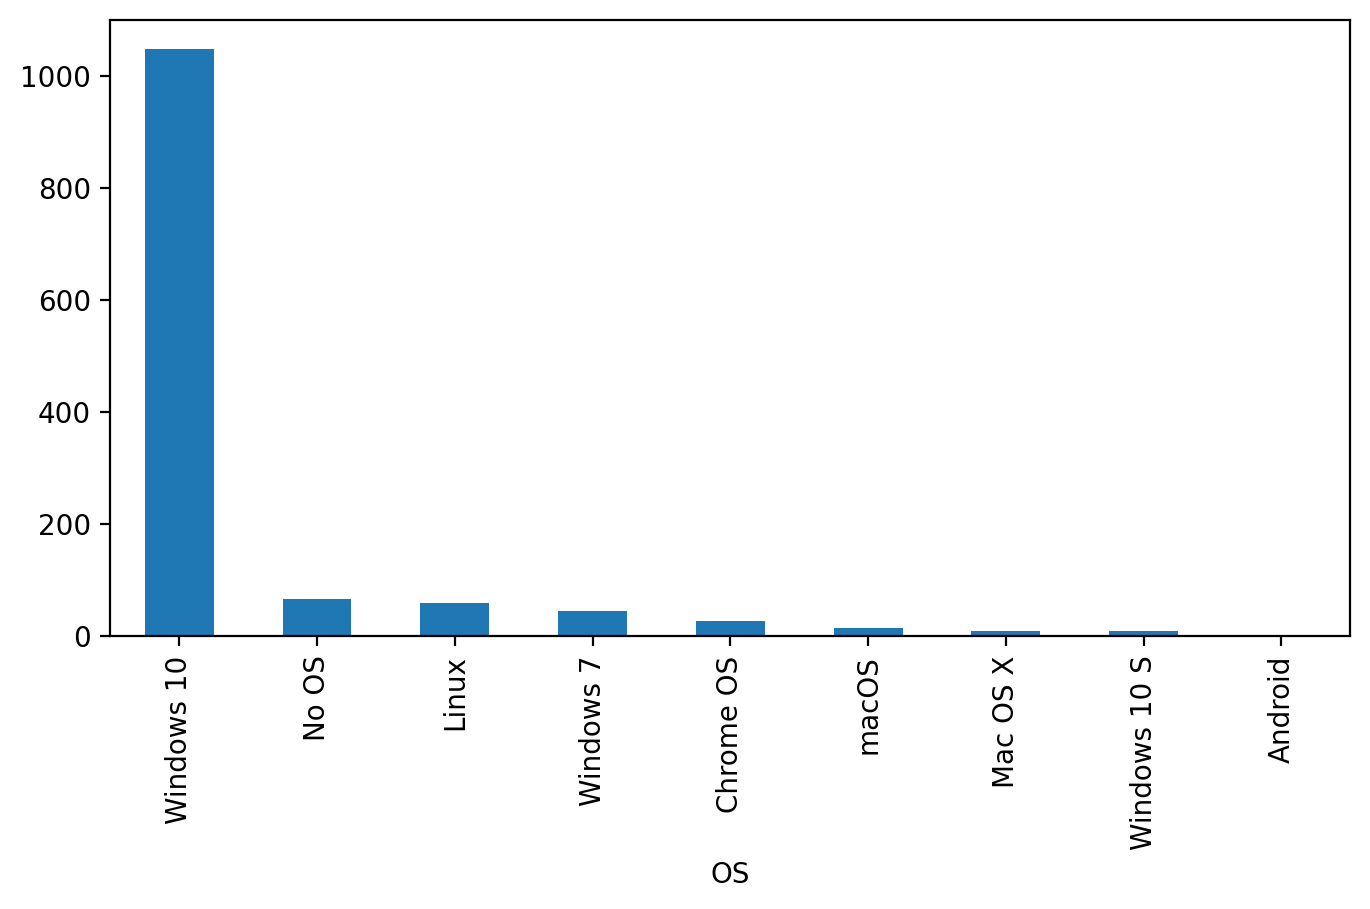

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot bar graph of os
df['OS'].value_counts().plot(kind = 'bar',x=df['OS'])
plt.show()

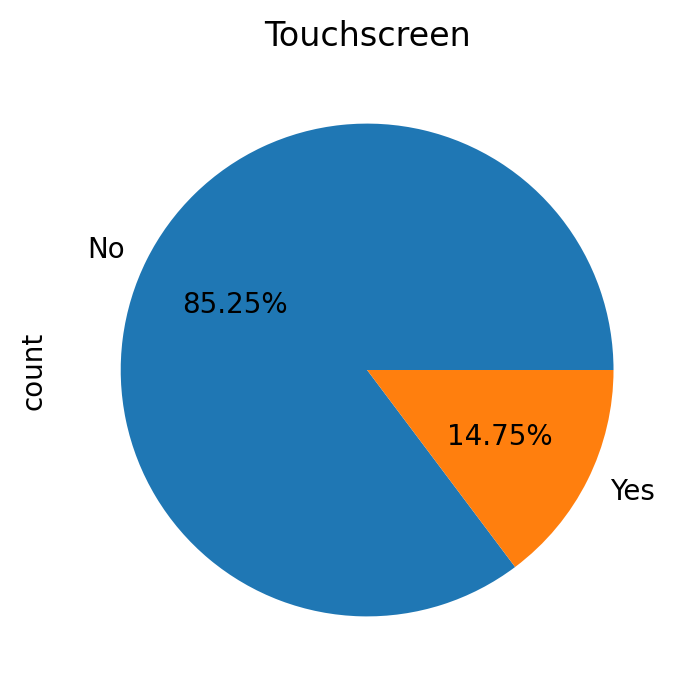

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot pie chart
df['Touchscreen'].value_counts().plot(kind = 'pie', autopct ='%.2f%%')
plt.title('Touchscreen')
plt.show()

In [ ]:
print(df['Touchscreen'].value_counts())

Touchscreen
No     1087
Yes     188
Name: count, dtype: int64


In [ ]:
print(df['Ram'].value_counts())

Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64


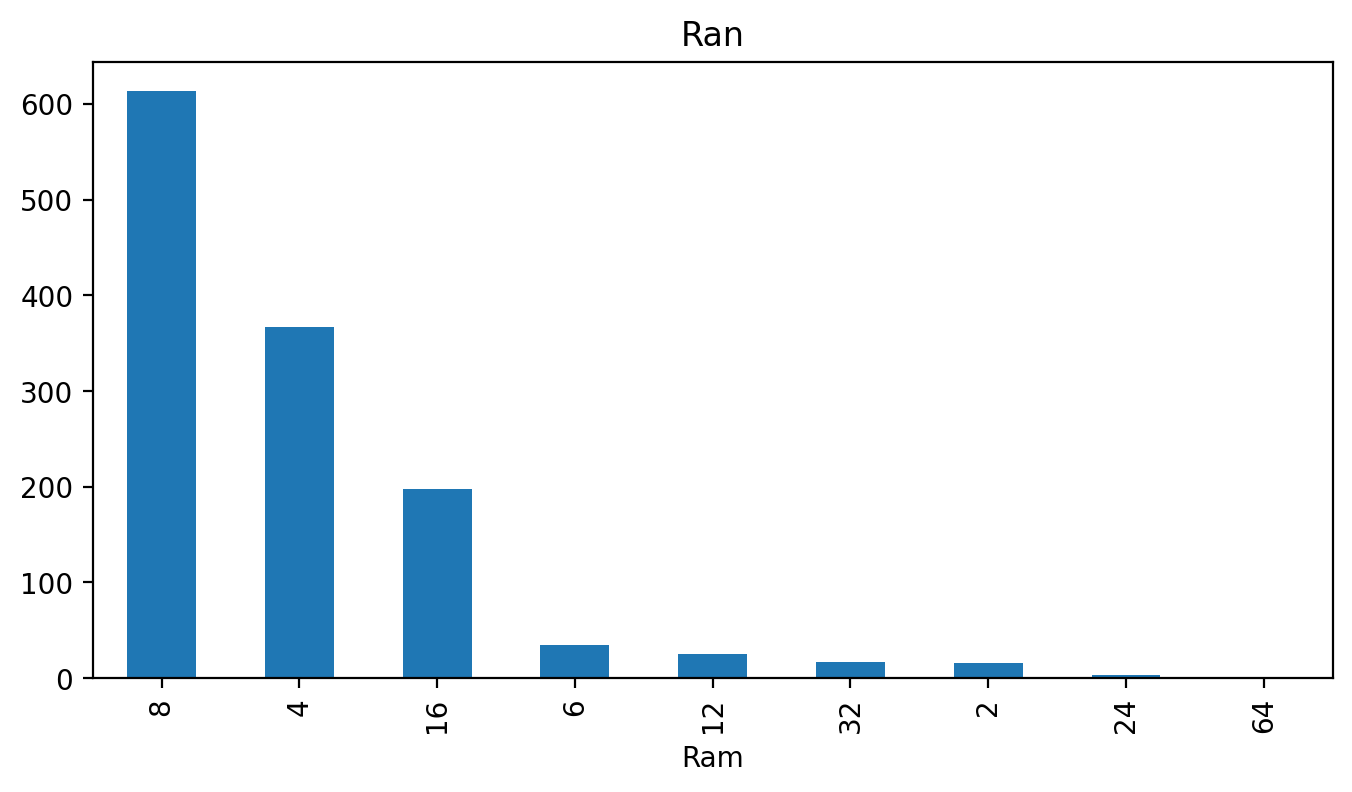

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot pie chart
df['Ram'].value_counts().plot(kind = 'bar')
plt.title('Ran')
plt.show()

In [ ]:
print(df["CPU_company"].value_counts())

CPU_company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64


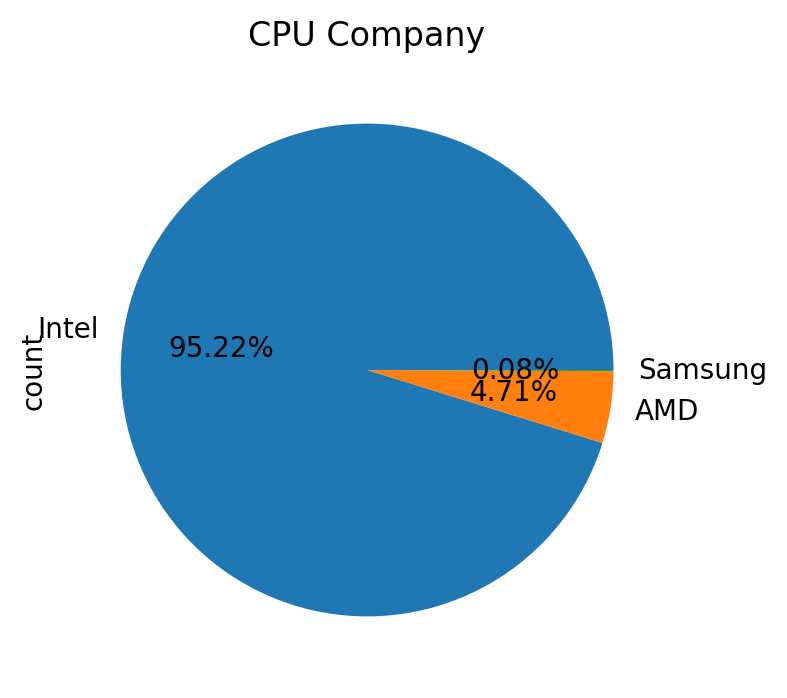

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot pie chart
df['CPU_company'].value_counts().plot(kind = 'pie', autopct ='%.2f%%')
plt.title('CPU Company')
plt.show()

In [ ]:
print(df['GPU_company'].value_counts())

GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64


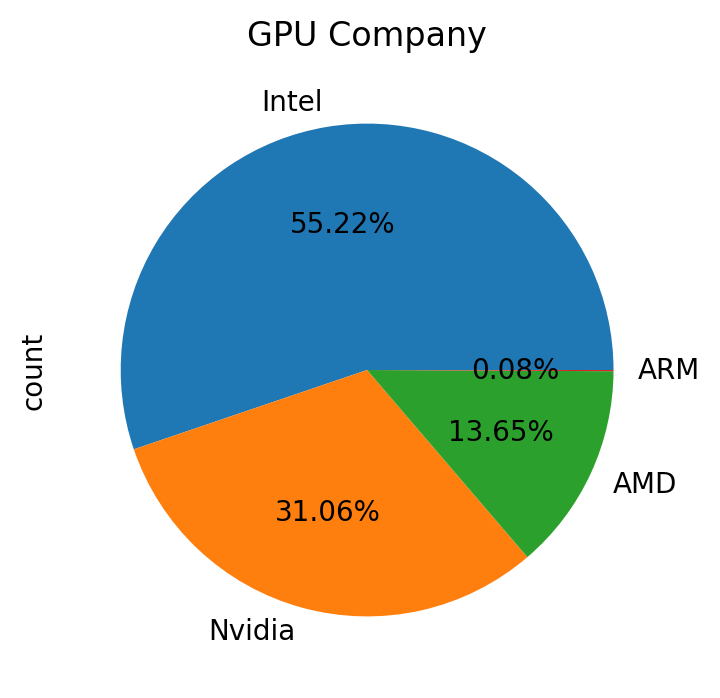

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot pie chart
df['GPU_company'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%', title = 'GPU_Company')
plt.title('GPU Company')
plt.show()

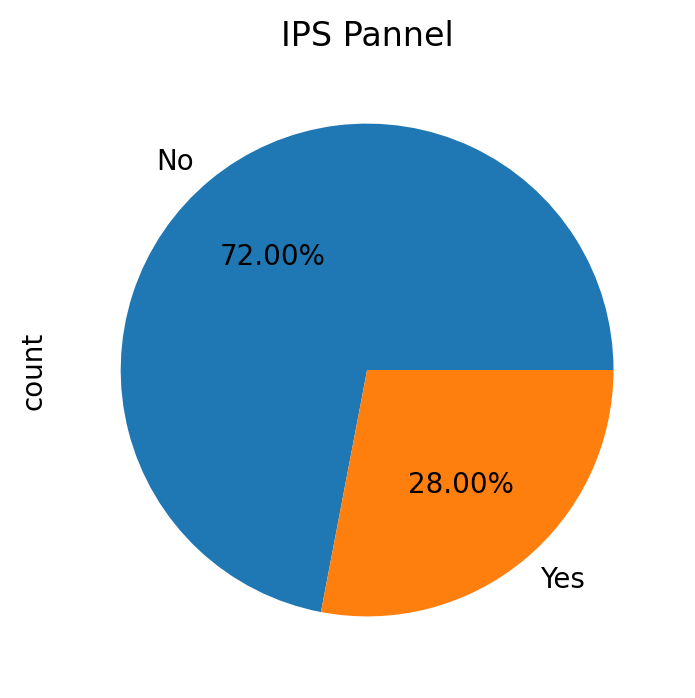

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot pie chart
df['IPSpanel'].value_counts().plot(kind = 'pie' , autopct ='%.2f%%')
plt.title('IPS Pannel')
plt.show()

In [ ]:
print(df['Inches'].value_counts())

Inches
15.6    647
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


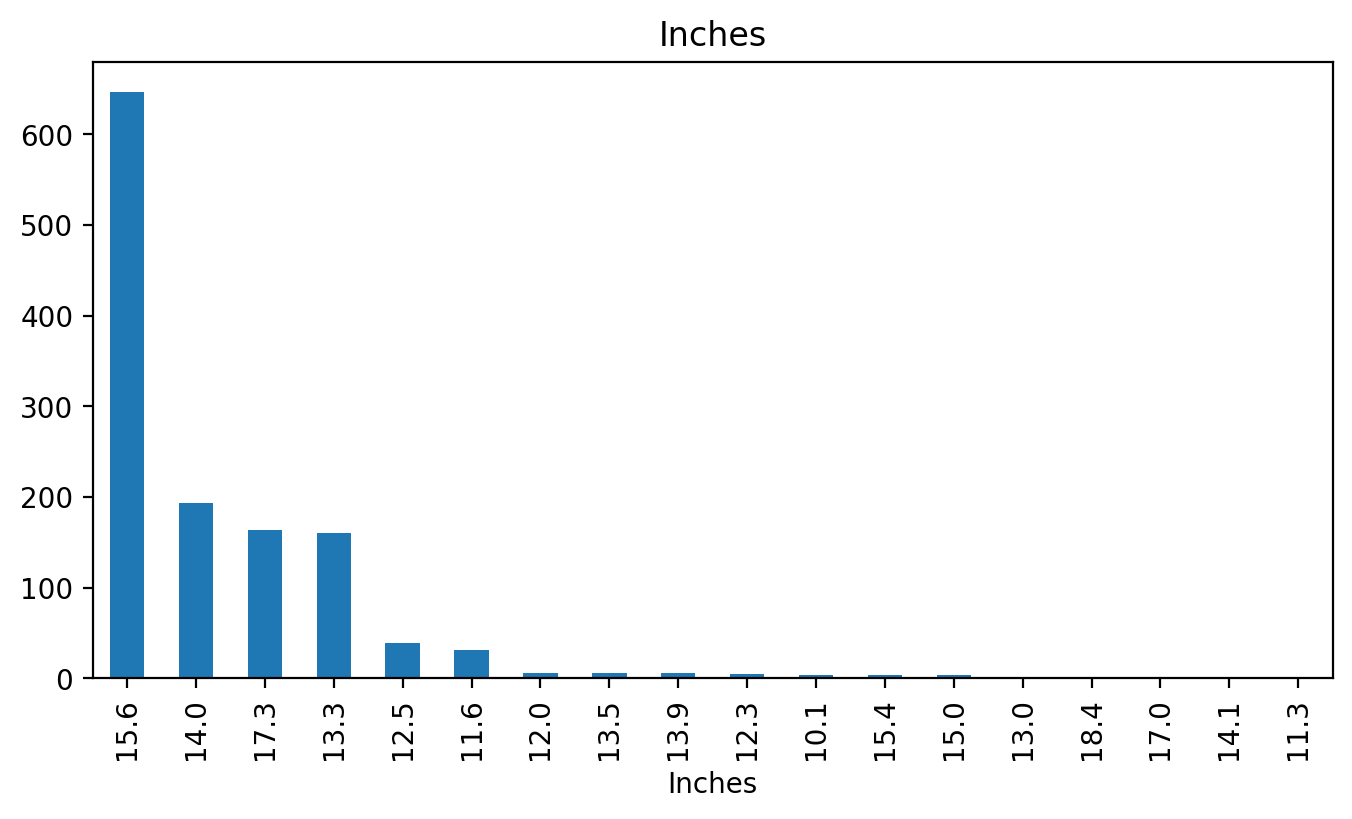

In [ ]:

plt.figure(figsize=(8, 4),dpi=200) ## plot bar chart
df['Inches'].value_counts().plot(kind = 'bar')
plt.title('Inches')
plt.show()

In [ ]:
print(df["PrimaryStorageType"].value_counts())

PrimaryStorageType
SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: count, dtype: int64


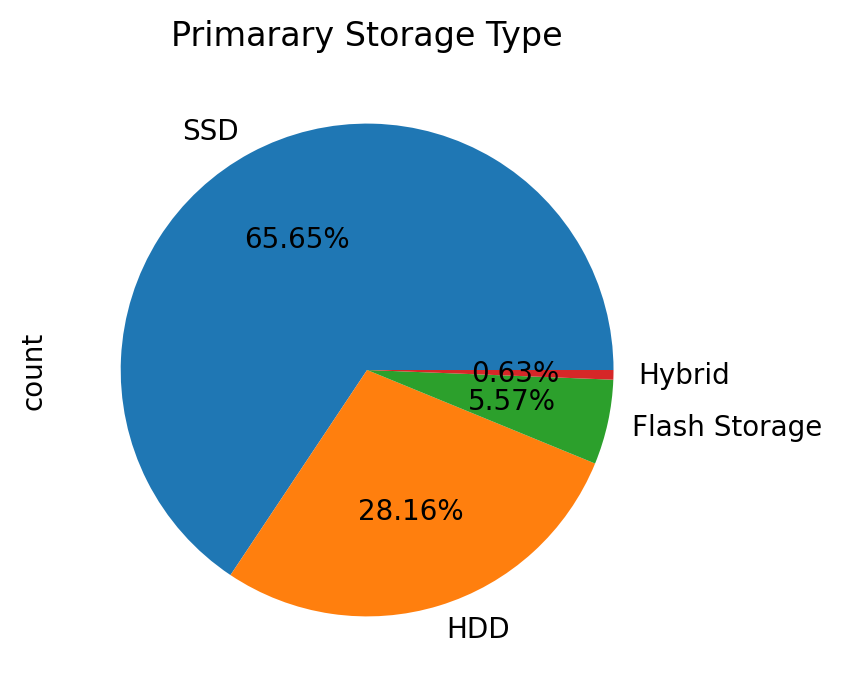

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot pie chart
df['PrimaryStorageType'].value_counts().plot(kind = 'pie' ,autopct = '%.2f%%')
plt.title('Primarary Storage Type')
plt.show()

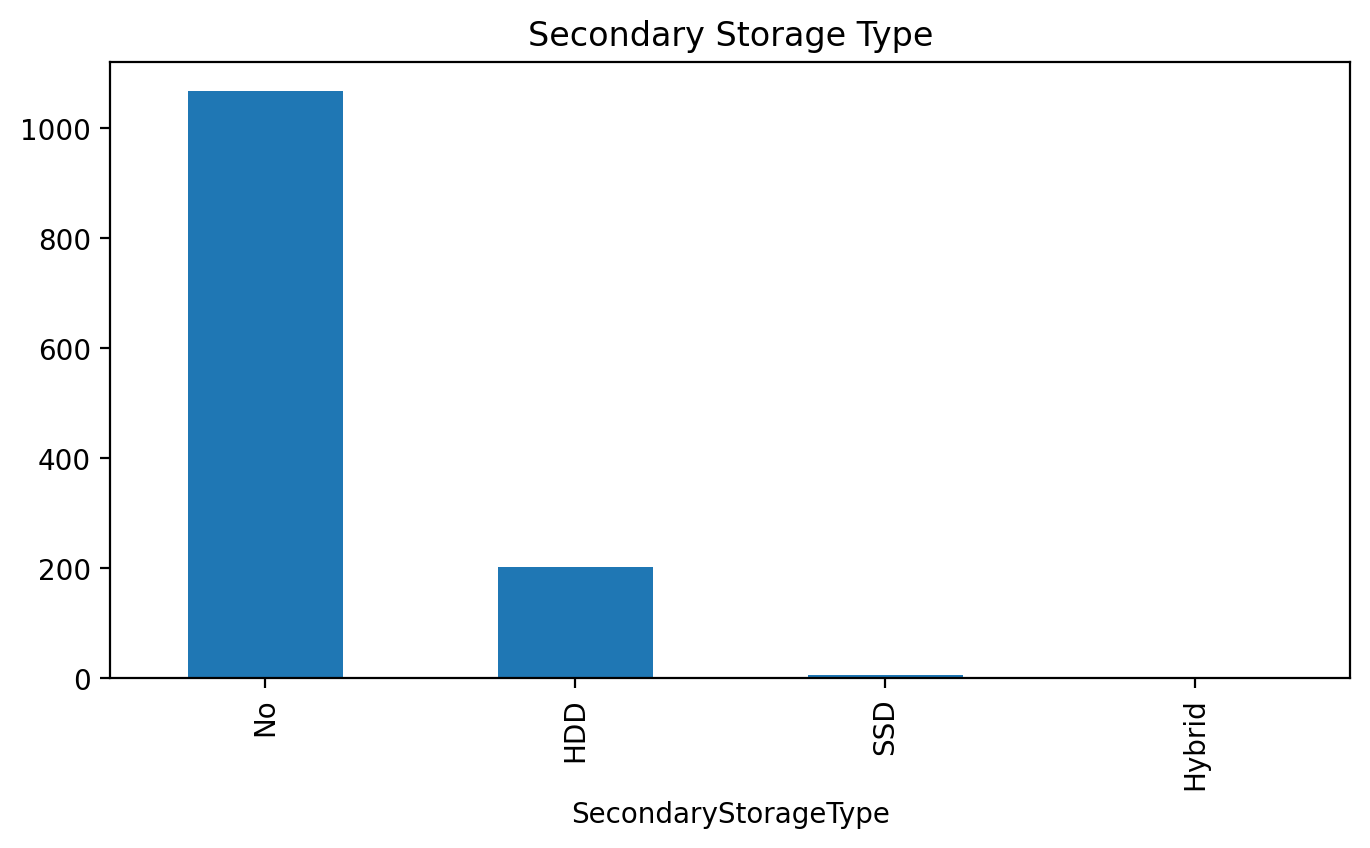

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot bar chart
df['SecondaryStorageType'].value_counts().plot(kind = 'bar')
plt.title('Secondary Storage Type')
plt.show()

In [ ]:
print(df['SecondaryStorageType'].value_counts())

SecondaryStorageType
No        1067
HDD        202
SSD          4
Hybrid       2
Name: count, dtype: int64


In [ ]:
print(df['Screen'].value_counts())

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64


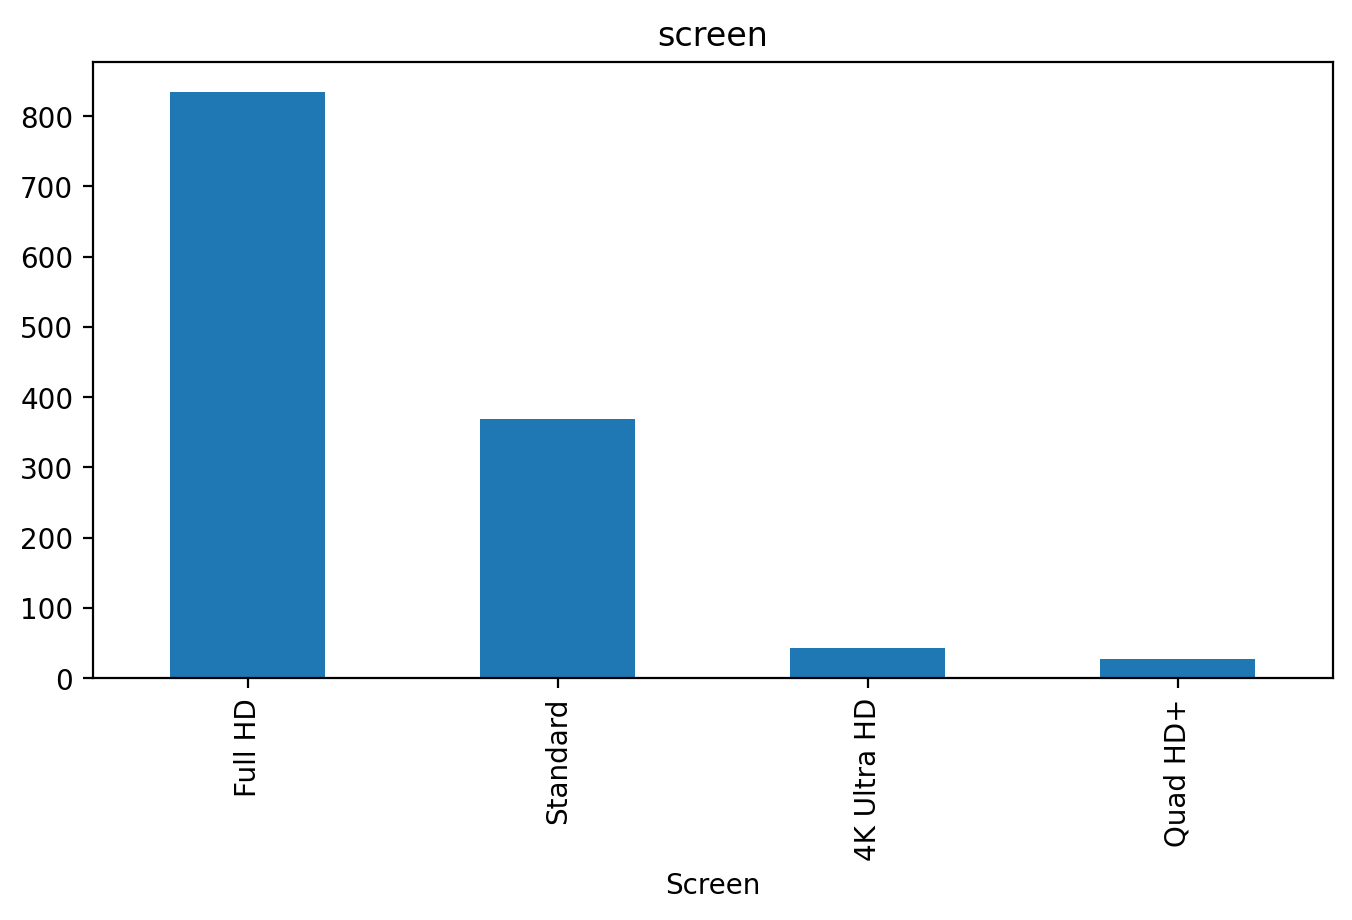

In [ ]:
plt.figure(figsize=(8, 4),dpi=200) ## plot bar chart

df['Screen'].value_counts().plot(kind = 'bar')
plt.title('screen')
plt.show()

<ipython-input-61-0bf79eae5920>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['OS'], y= df['Price_euros'],palette="magma")


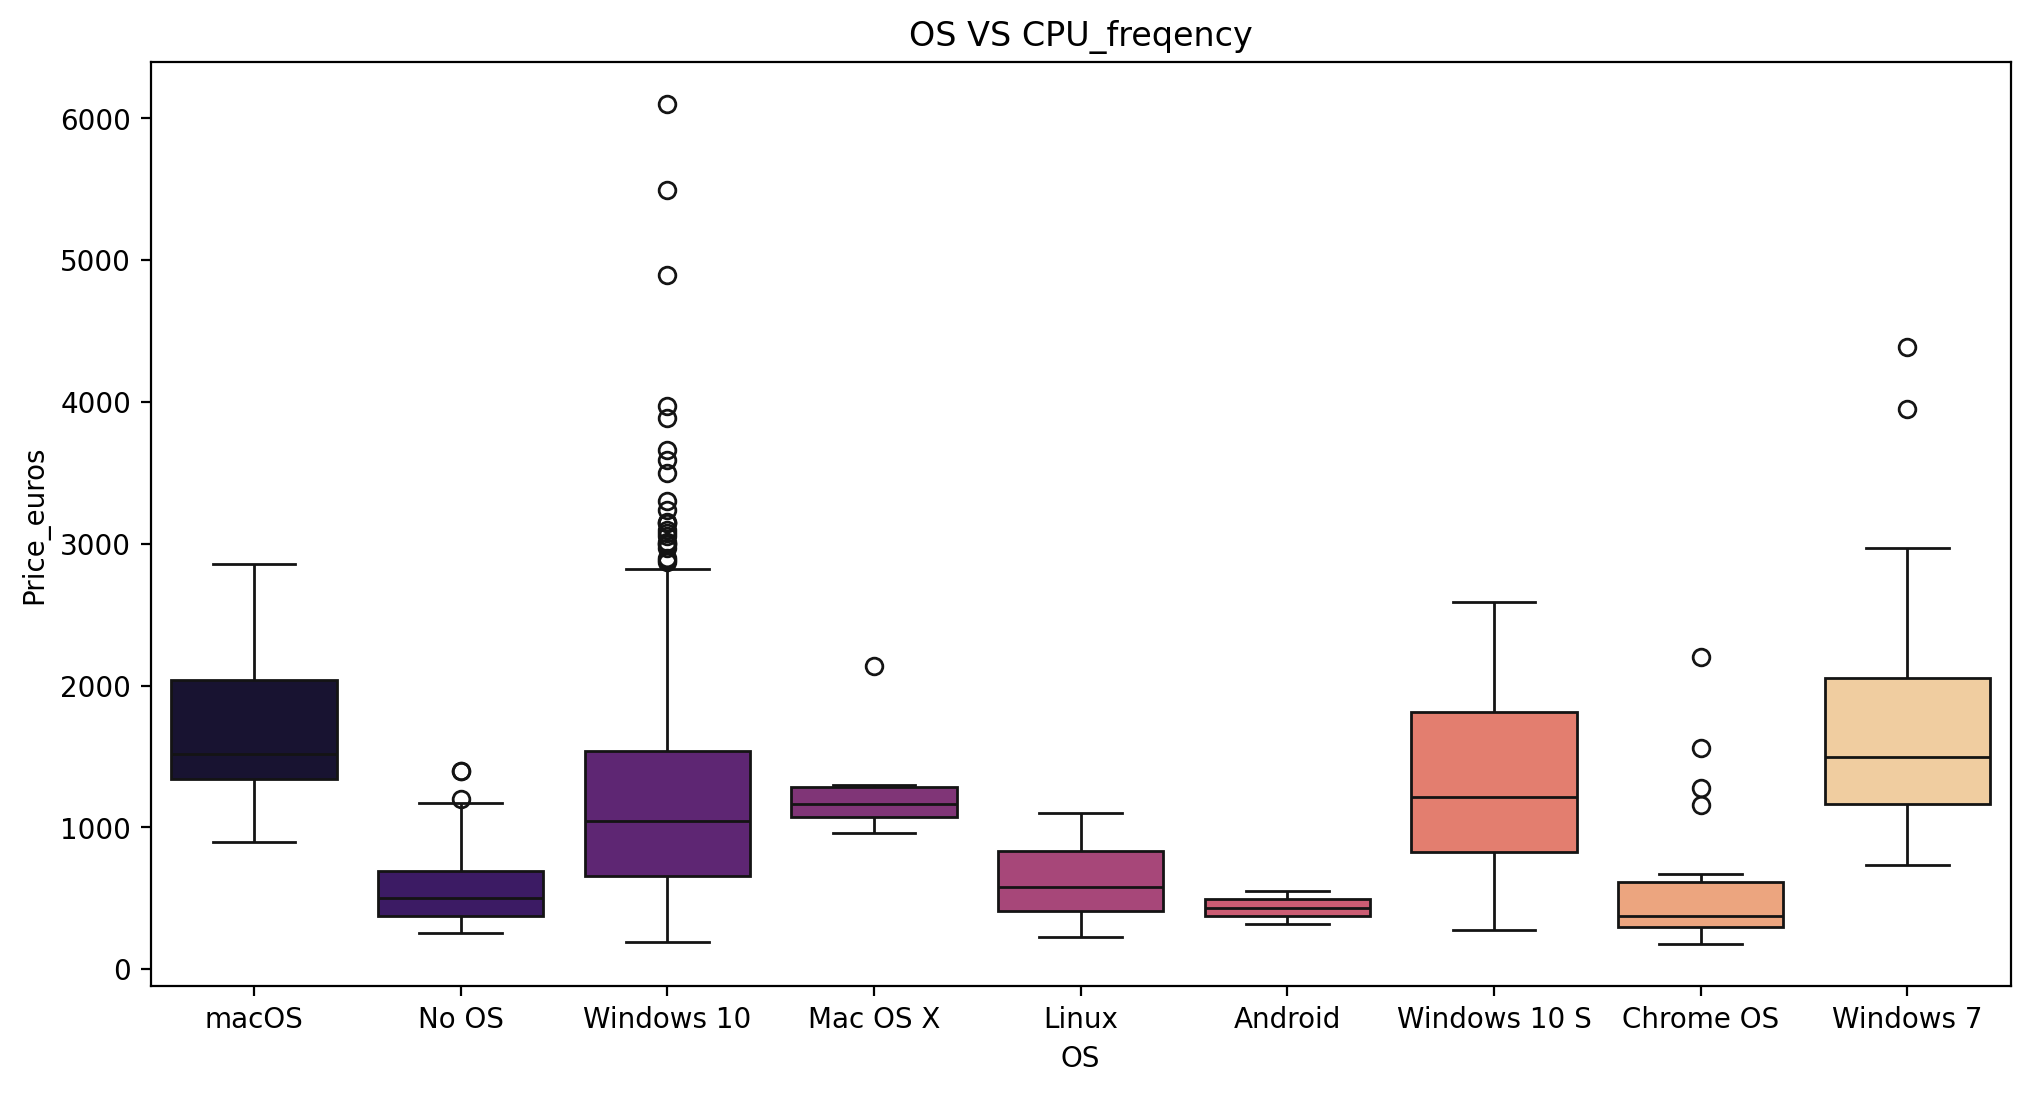

In [ ]:
plt.figure(figsize=(12, 6),dpi=200) ## seaborn box plot
sns.boxplot(x = df['OS'], y= df['Price_euros'],palette="magma")
plt.title('OS VS CPU_freqency')
plt.show()

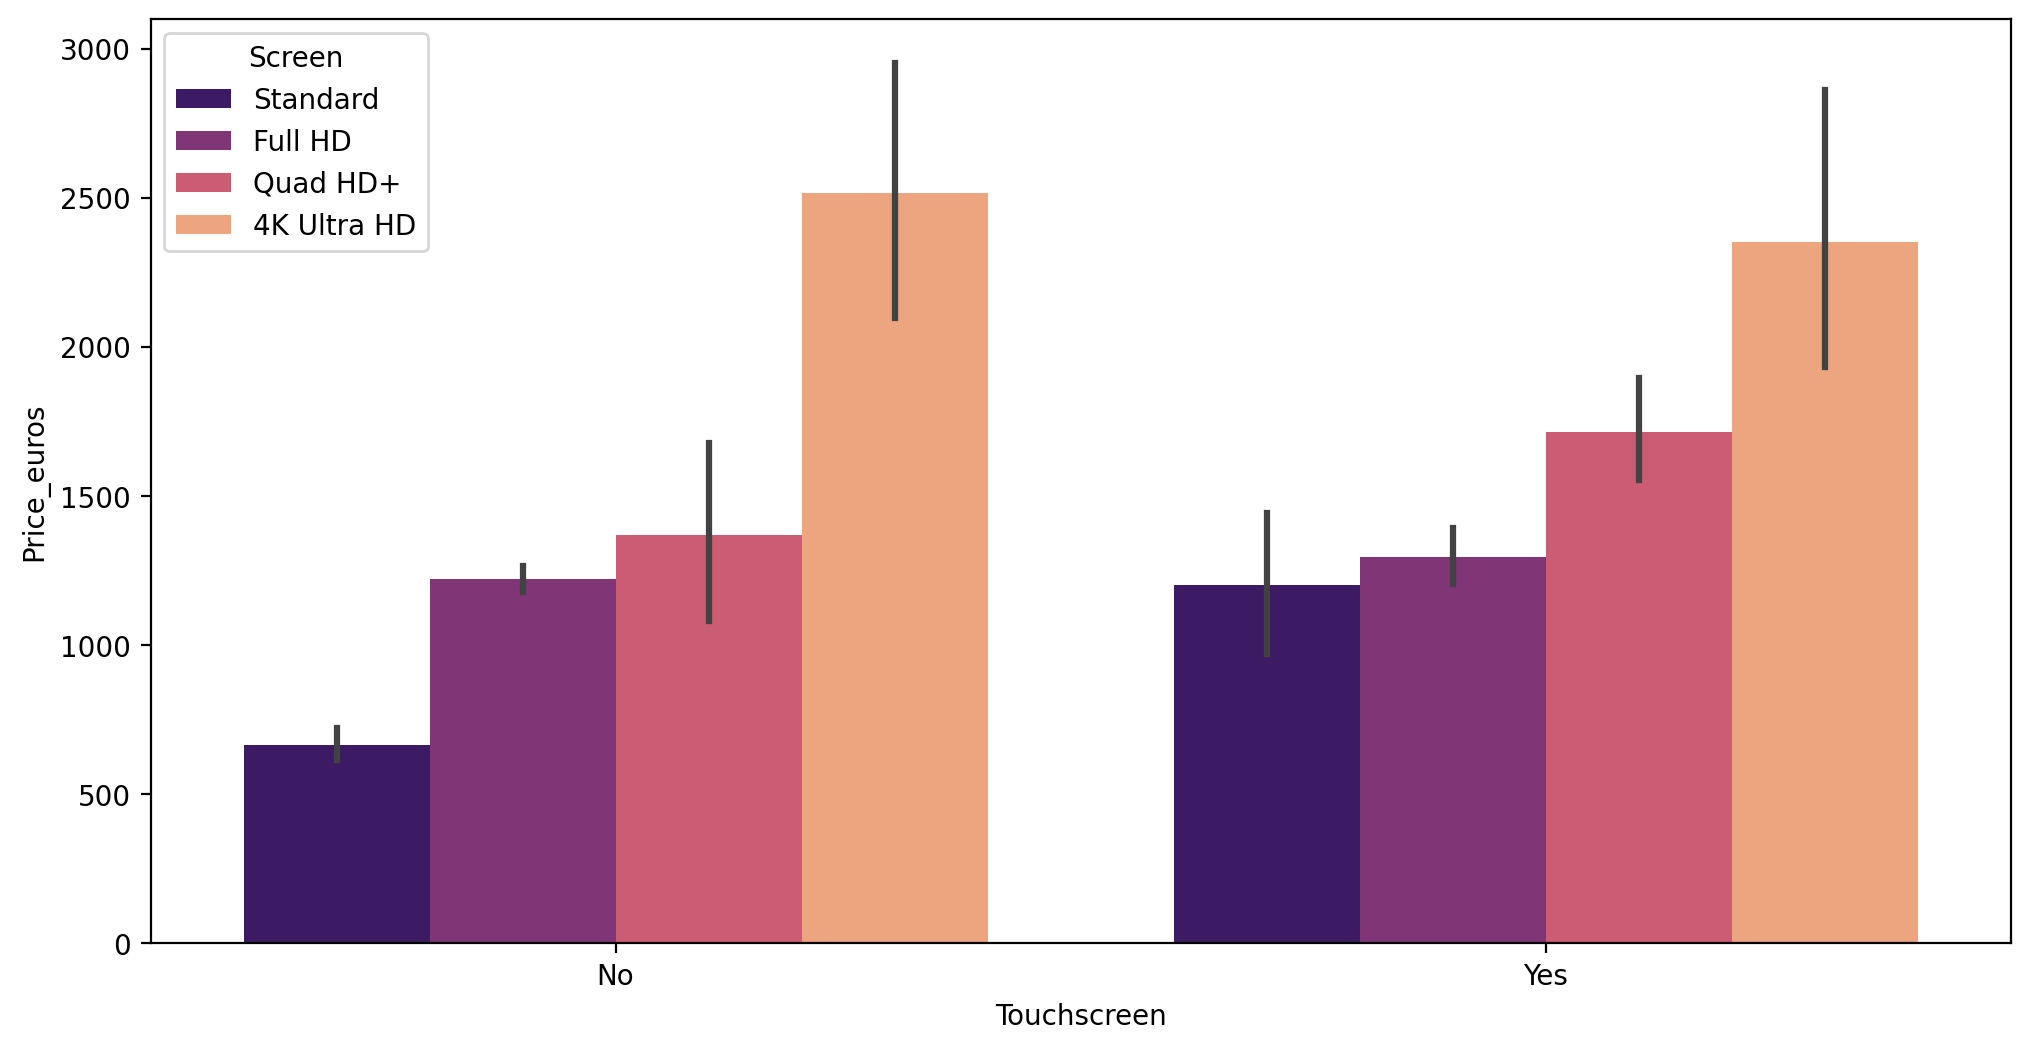

In [ ]:
plt.figure(figsize = (12,6),dpi=200)
sns.barplot(x = df['Touchscreen'], y= df['Price_euros'] ,hue = df['Screen'],palette="magma")
plt.show()

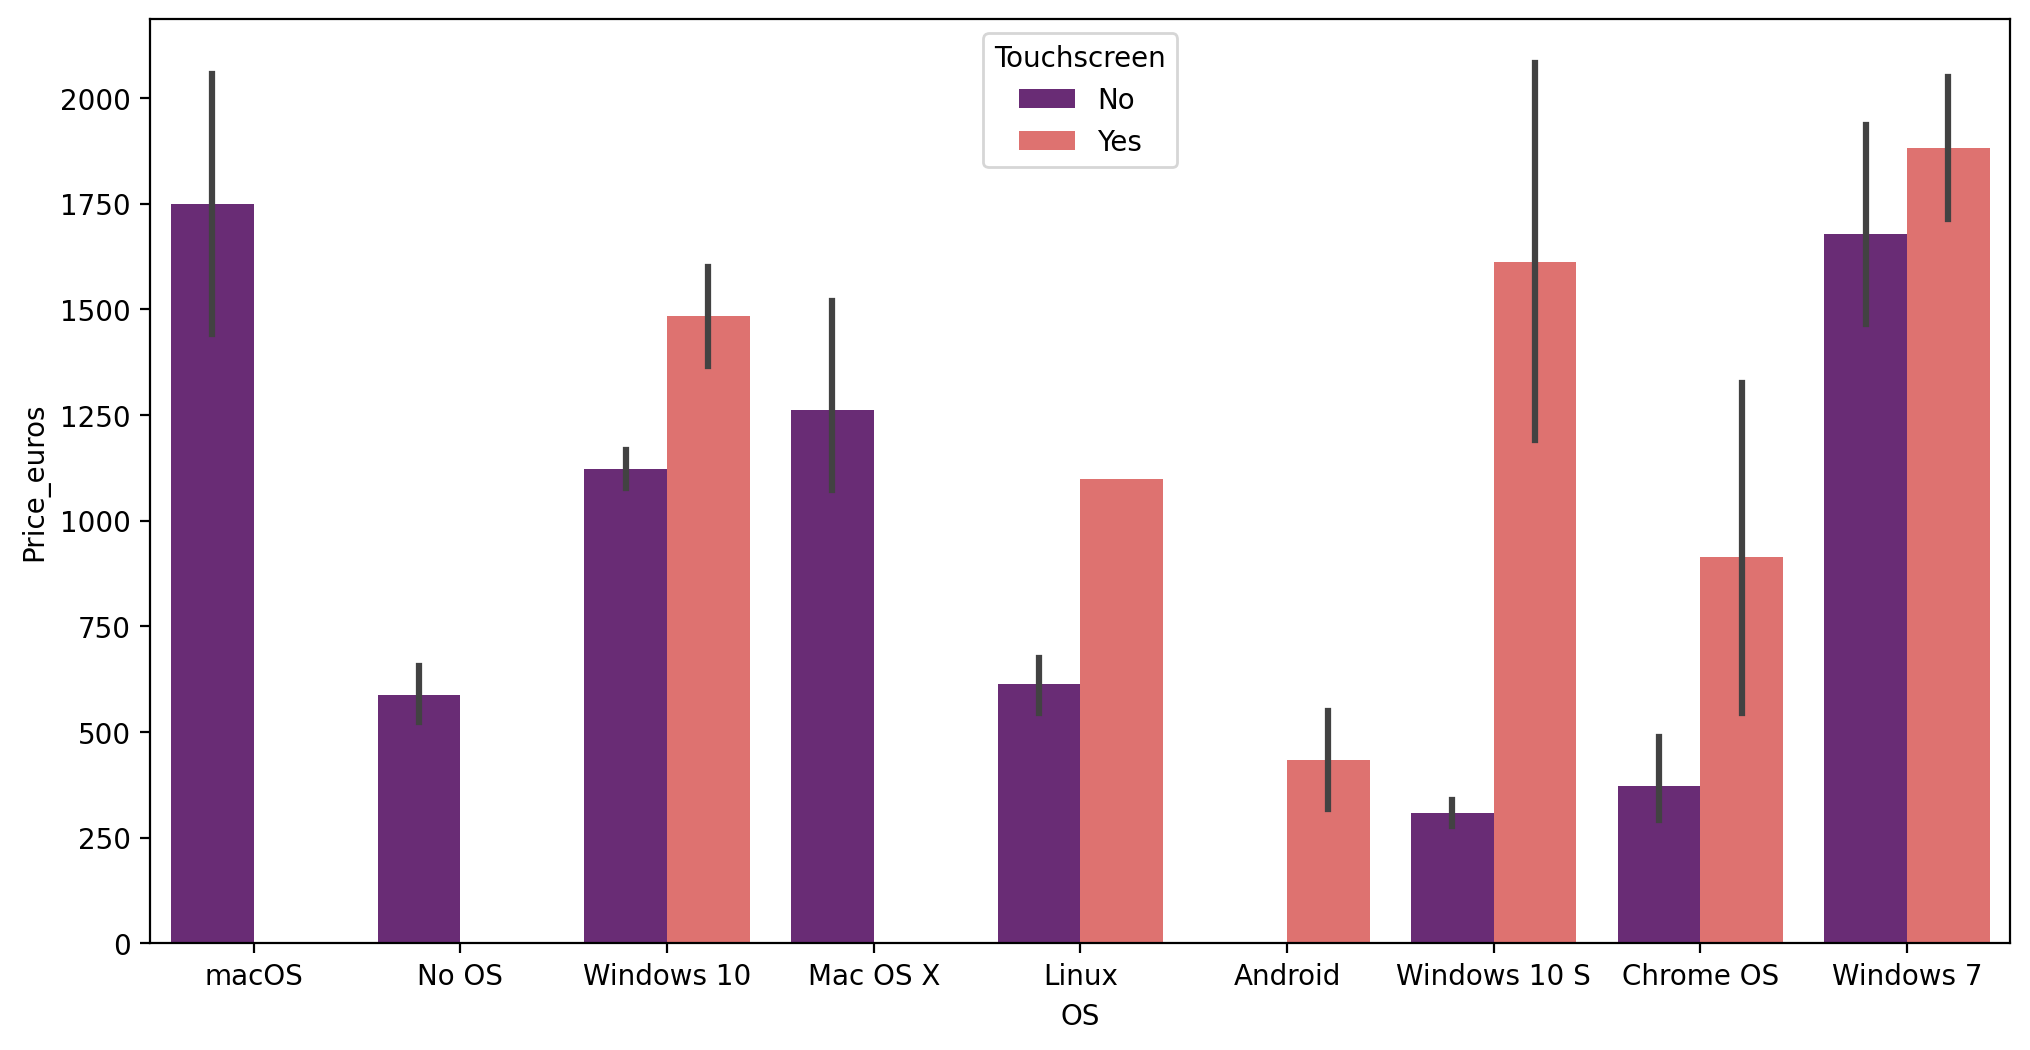

In [ ]:
plt.figure(figsize = (12,6),dpi=200)
sns.barplot(x = df['OS'], y= df['Price_euros'] , hue =df['Touchscreen'],palette="magma")
plt.show()

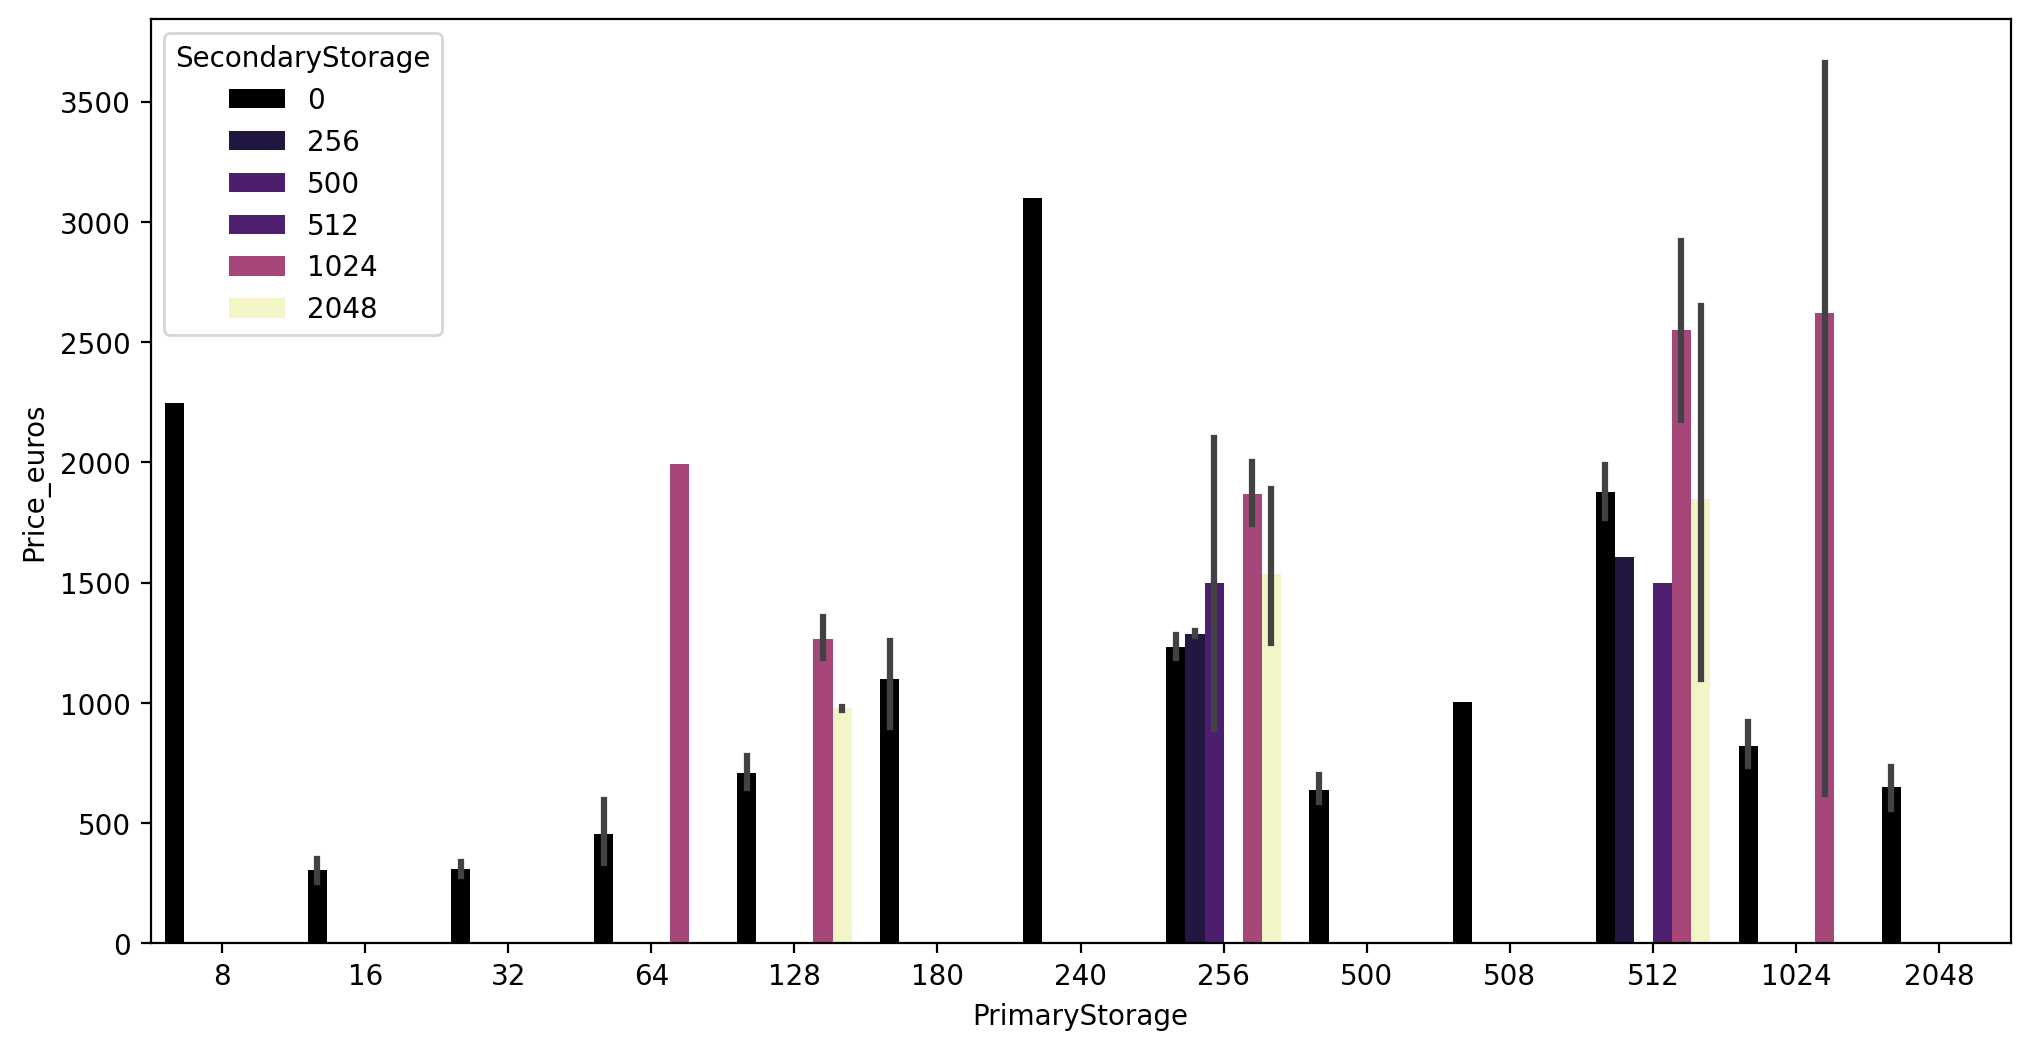

In [ ]:
plt.figure(figsize = (12,6),dpi=200)
sns.barplot(x = df['PrimaryStorage'], y= df['Price_euros'], hue =df['SecondaryStorage'],palette='magma')
plt.show()

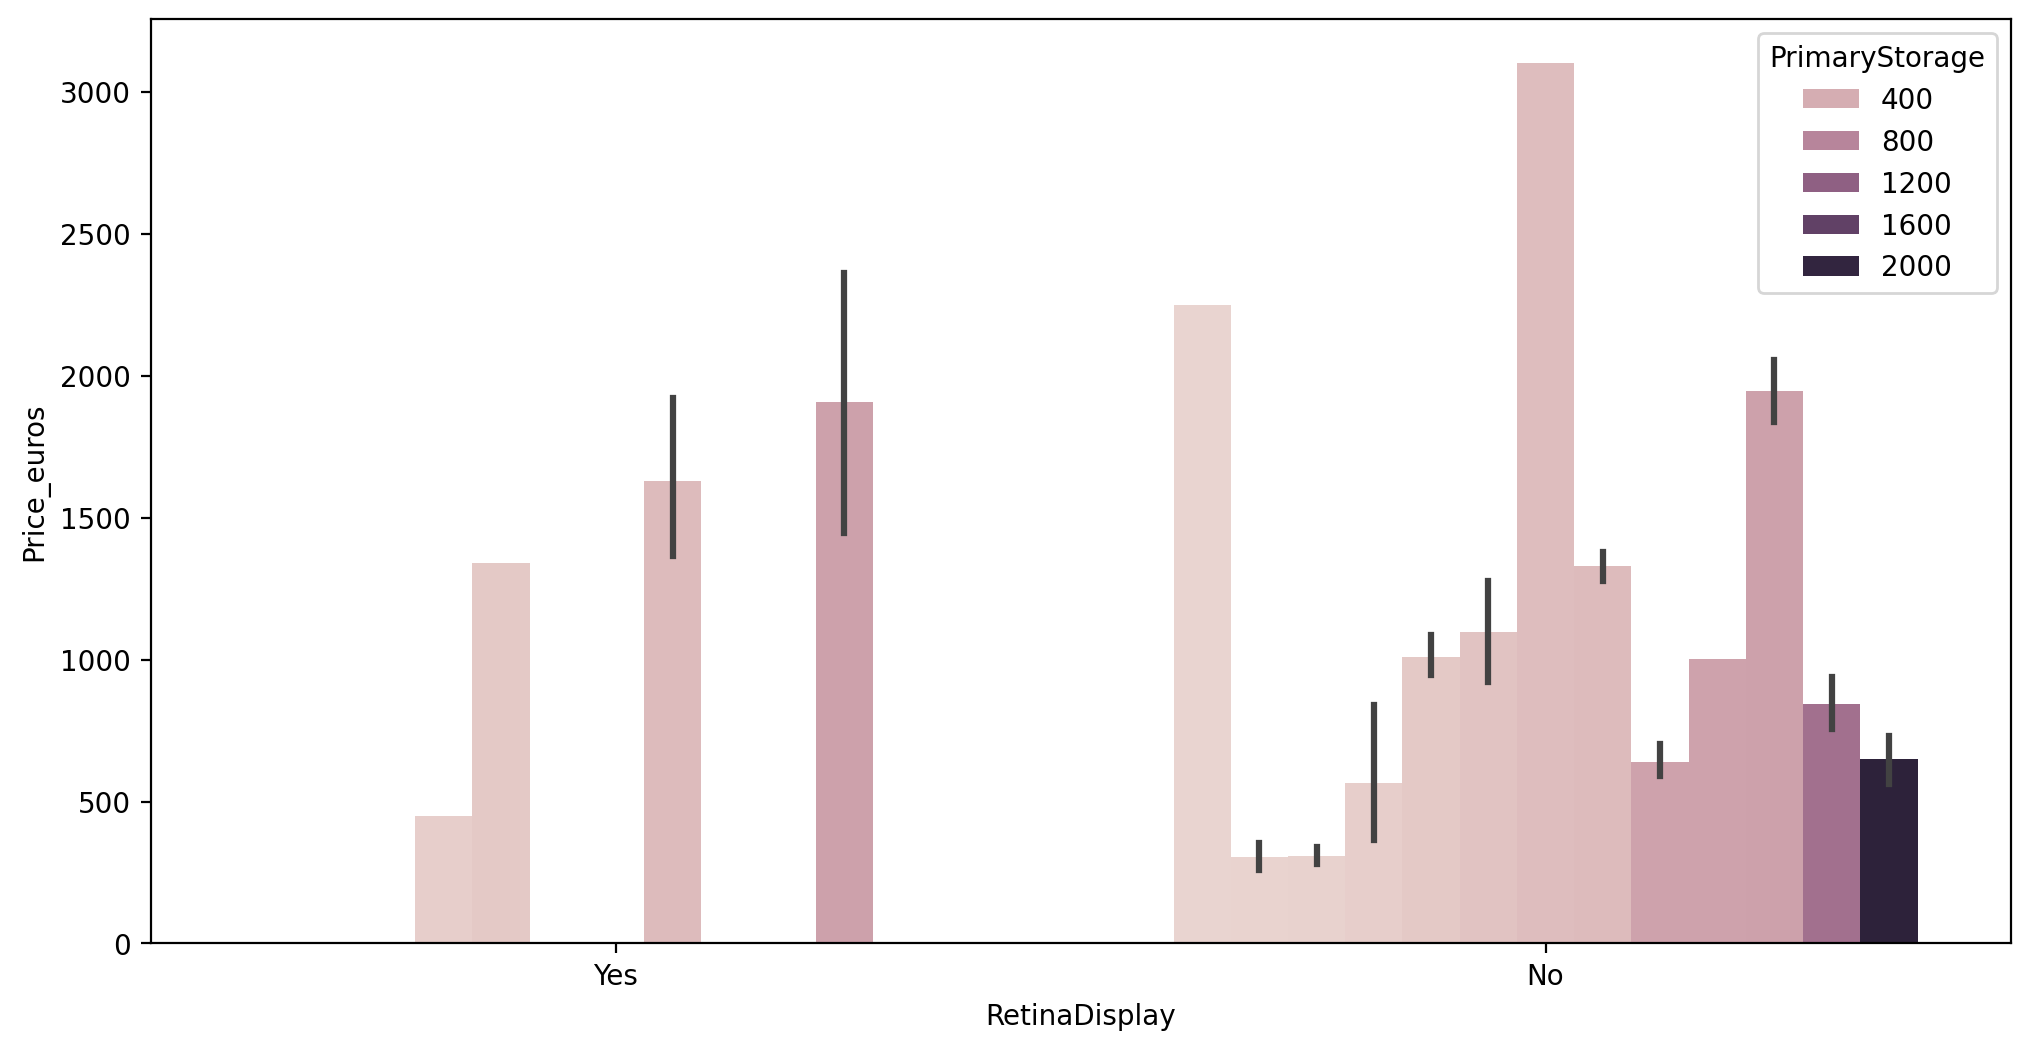

In [ ]:
plt.figure(figsize = (12,6),dpi=200)
sns.barplot(x = df['RetinaDisplay'], y= df['Price_euros'],hue = df['PrimaryStorage'])
plt.show()

[]

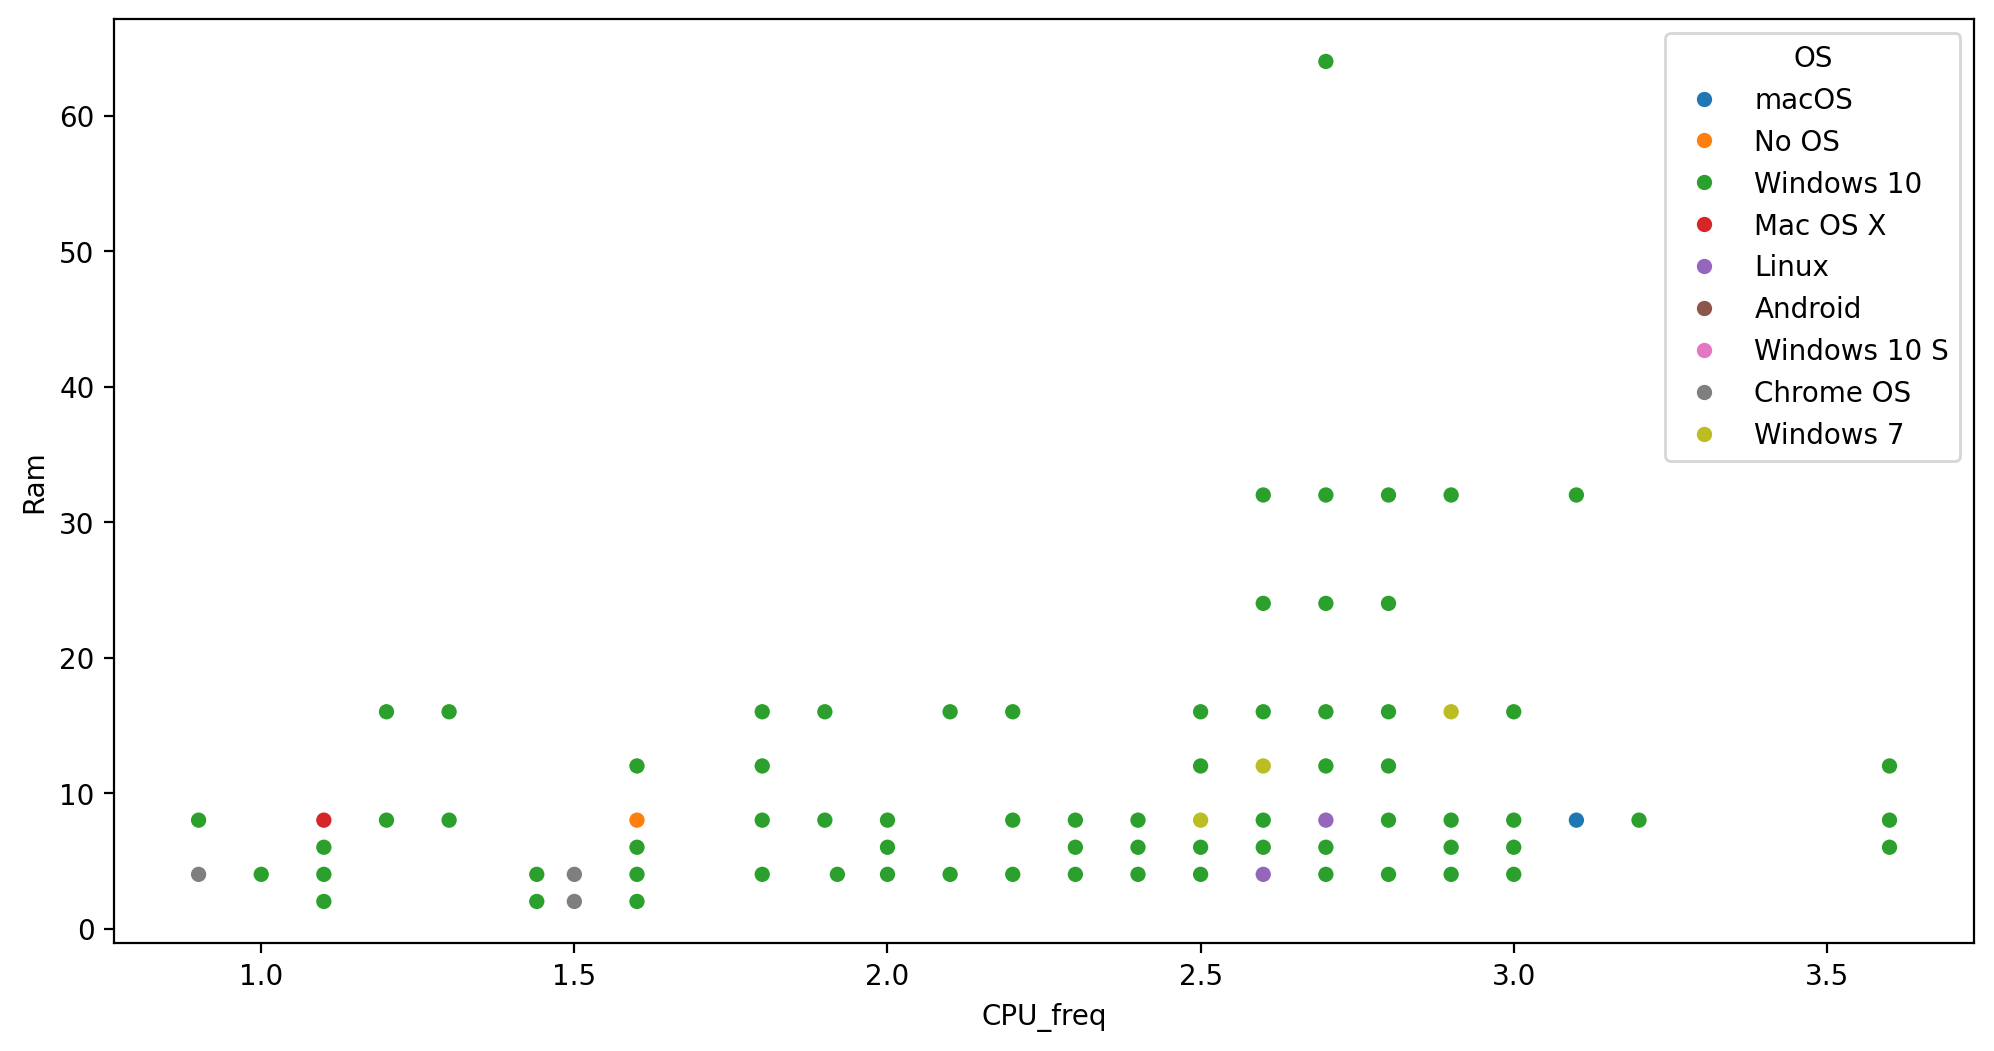

In [ ]:
plt.figure(figsize = (12,6),dpi=200)
sns.scatterplot(data = df , x= df['CPU_freq'], y =
df['Ram'], hue = df['OS'])
plt.plot()

[]

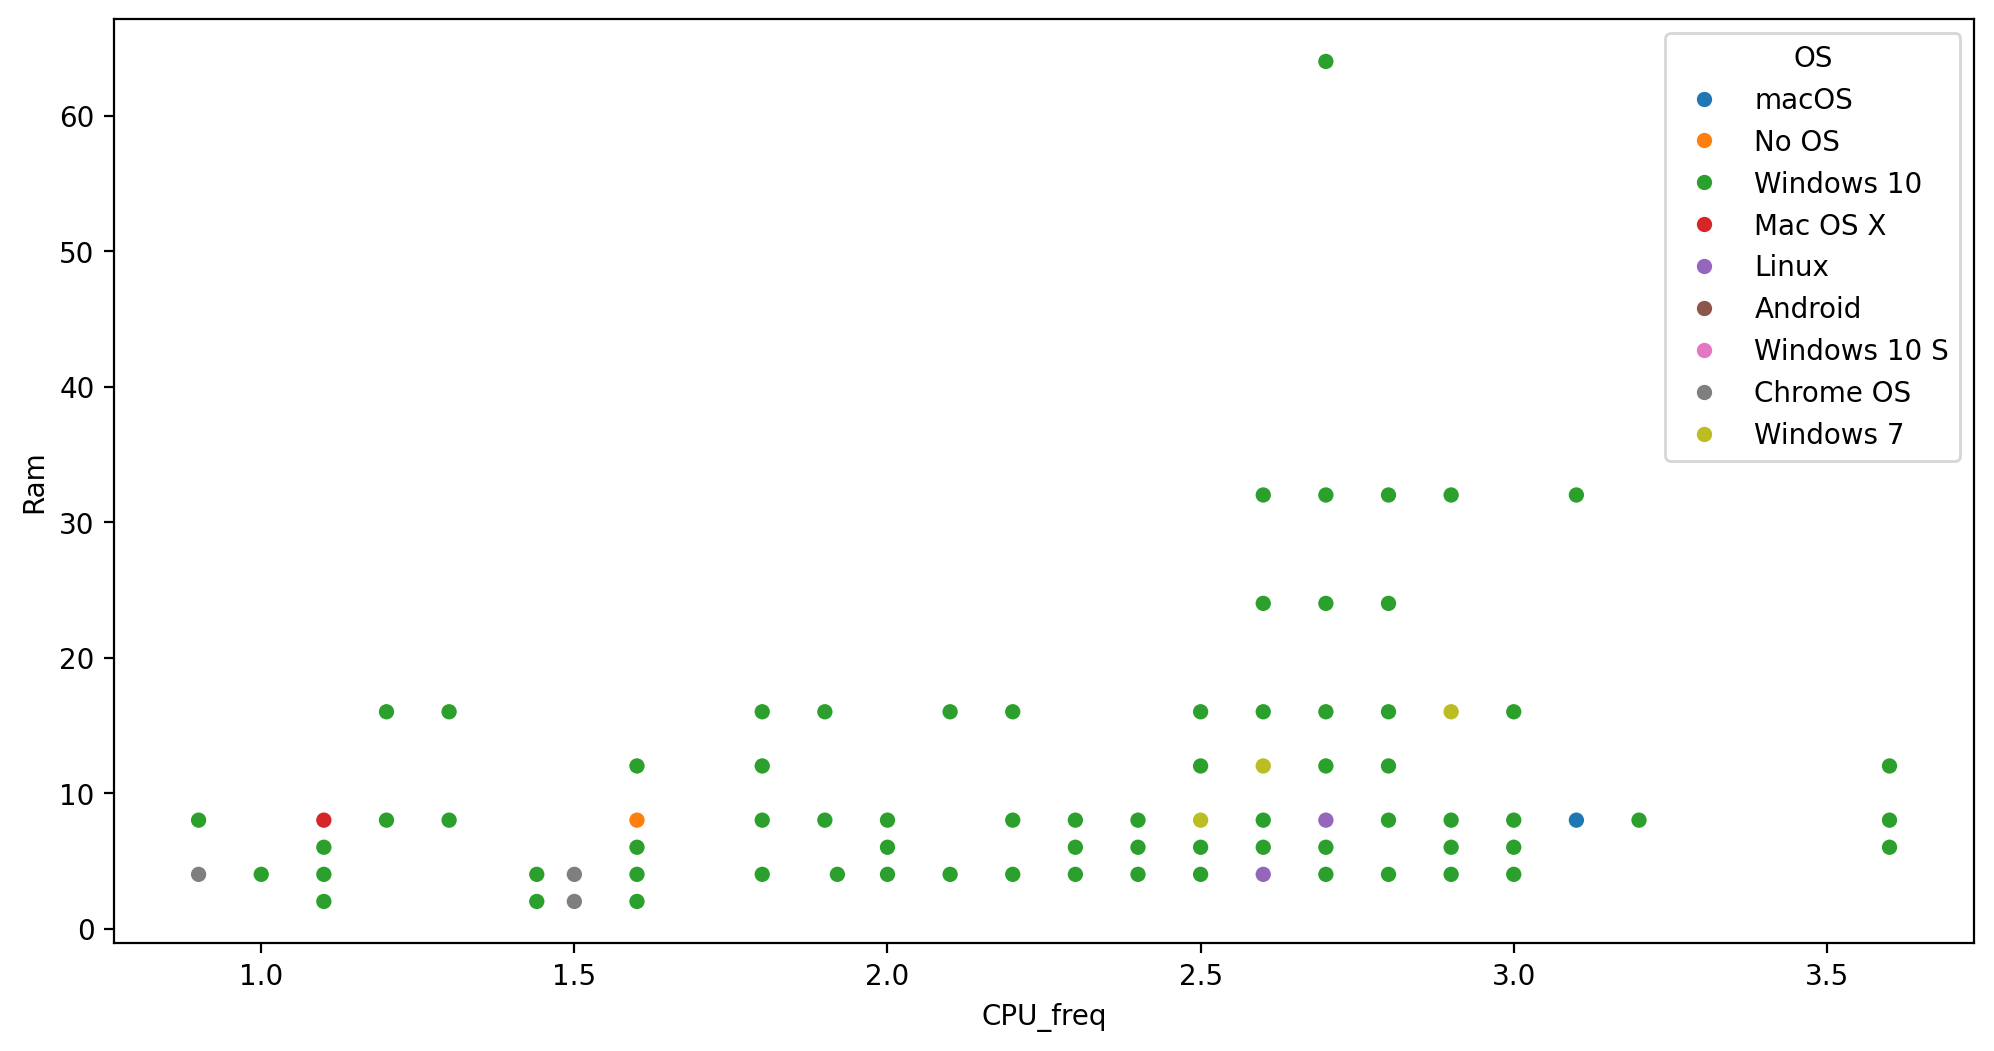

In [ ]:
plt.figure(figsize = (12,6),dpi=200)
sns.scatterplot(data = df , x= df['CPU_freq'], y =
df['Ram'], hue = df['OS'])
plt.plot()

<h1>Creating Model</h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target
X = df.drop(columns=["Price_euros", "Product"])  # Dropping product as it's a specific model name
y = df["Price_euros"]

# Encoding categorical features
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for reference

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  numerical features scaled
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

## Predictions
y_pred = LR_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing results
mse, r2


(128666.70437356844, 0.740768641705731)

In [ ]:
import pickle
pickle.dump(scaler,open('Standard_scaller.pkl','wb'))

In [ ]:
X_test[0]

array([ 0.14056151,  0.31893554,  0.41718536, -0.84820014,  0.19025216,
        0.06237595,  1.45600892, -1.04965199, -1.04592866, -0.40871513,
       -0.61209727, -0.11796822,  0.2175177 ,  0.00852449, -0.75469007,
        0.14166089, -0.42335546, -1.16237841,  0.42417674, -0.00835924,
       -0.06510714])

In [ ]:
print(len(label_encoders))

13


In [ ]:
Accuracy = LR_model.score(X_test, y_test)
print(Accuracy)

0.740768641705731


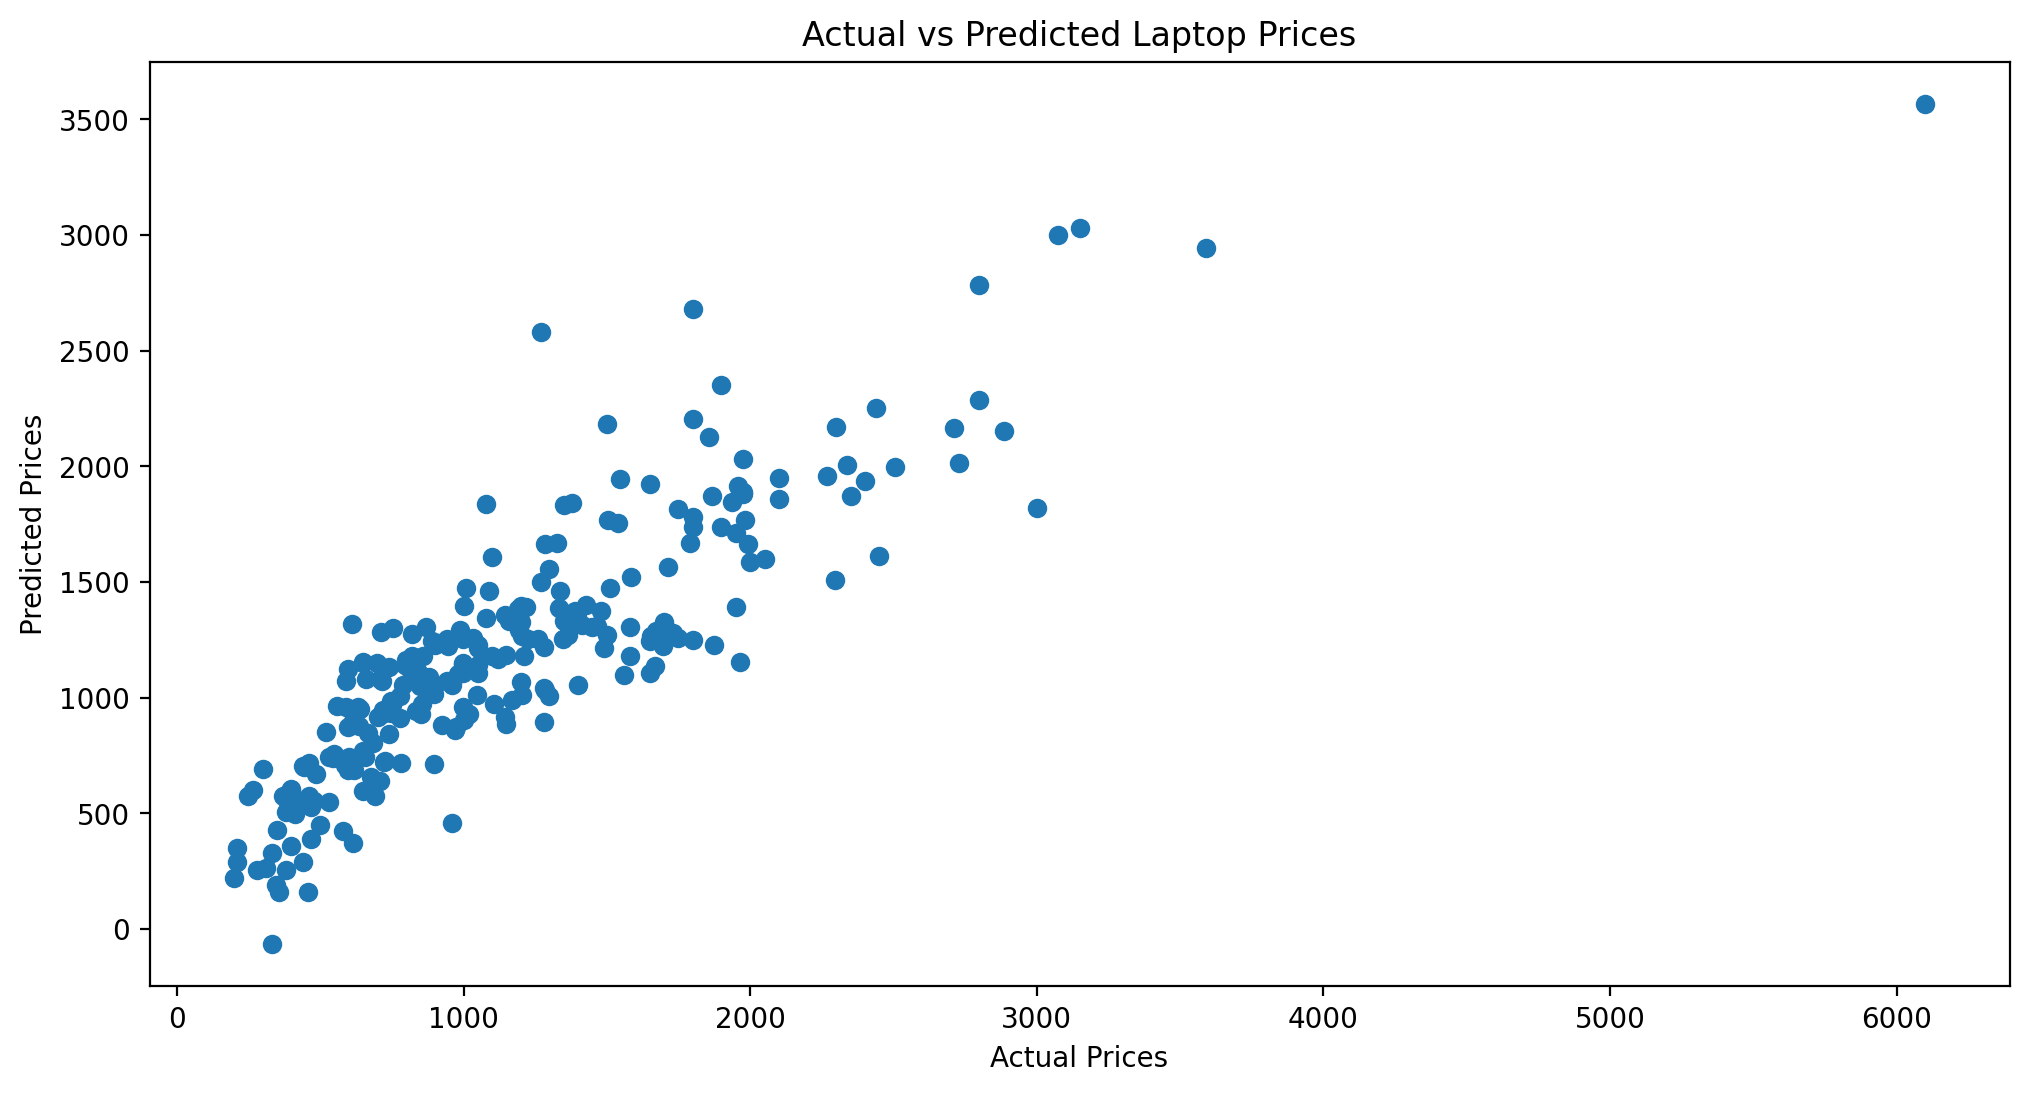

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [ ]:
df['Weight'].max()

4.7

In [ ]:
# Manually setting values for all 21 features
random_laptop = [
    2,    # Company (e.g., Asus)
    1,    # TypeName (e.g., Gaming)
    15.6, # Inches
    16,   # Ram (GB)
    2.3,  # Weight (kg)
    1920, # ScreenW (Resolution Width)
    1080, # ScreenH (Resolution Height)
    5,    # OS (e.g., Windows 10)
    1,    # Touchscreen (1 = Yes, 0 = No)
    1,    # IPSpanel (1 = Yes, 0 = No)
    0,    # RetinaDisplay (1 = Yes, 0 = No)
    1,    # CPU_company (e.g., Intel)
    4,    # CPU_model (e.g., Intel Core i7)
    2.8,  # CPU_freq (GHz)
    512,  # PrimaryStorage (GB)
    0,    # PrimaryStorageType (e.g., SSD)
    1024, # SecondaryStorage (GB)
    1,    # SecondaryStorageType (e.g., HDD)
    2,    # GPU_company (e.g., NVIDIA)
    3,    # GPU_model (e.g., GTX 1650)
    1500  # Battery Life (Assuming a numerical value, replace if different)
]

# Reshaping and scaling the input
random_laptop_scaled = scaler.transform([random_laptop])

# Predicting price
predicted_price_random = LR_model.predict(random_laptop_scaled)[0]

predicted_price_random


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


361009.00423539814

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Evaluate model
rf_accuracy = rf_model.score(X_test, y_test)

rf_accuracy


0.8736670099105343

In [ ]:
import pickle
pickle.dump(rf_model,open('rf_model.pkl','wb'))

In [ ]:
random_laptop_scaled = scaler.transform([random_laptop])

# Predicting price by Random Forest model
predicted_price_rf = rf_model.predict(random_laptop_scaled)[0]

## predicted price
predicted_price_rf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2659.2406999999985

In [ ]:
from xgboost import XGBRegressor

# Creating XGBoostRegressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Evaluat the model
xgb_accuracy = xgb_model.score(X_test, y_test)

#  XGBoost prediction
predicted_price_xgb = xgb_model.predict(random_laptop_scaled)[0]

xgb_accuracy, predicted_price_xgb


(0.8769319340791275, 2081.235)

In [ ]:
rf_model = pickle.load(open('/content/rf_model.pkl','rb'))
np.round(rf_model.predict(random_laptop_scaled)[0],2)

2659.24

In [ ]:
pickle.dump(xgb_model,open('xgb_model.pkl','wb'))